# Van der Pol equiation

$$
u'' = \mu(1 - u^2) u' - u
$$
$$
u(0) = 2, u'(0) = 0
$$

Van der Pol equiation as system

$$
u' = v
$$
$$
v' = \mu(1 - u^2)v - u
$$
$$
u(0) = 2, v(0) = 0
$$

In [94]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *

mu1 = 10
mu2 = 50
mu3 = 100

def f(mu, t, u):
    y0, y1 = u
    return np.asarray([y1, 0])

def g(mu, t, u):
    y0, y1 = u
    return np.asarray([0, mu * (1 - y0**2) * y1 - y0])

In [95]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

In [96]:
Tl = 0
Tr = 50
h_exact1, t_exact1, y_exact1 = IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), [2, 0], A, A_, b, b_, c, Tl, Tr, 2**15)
h_exact2, t_exact2, y_exact2 = IMEX(lambda t, u: f(mu2, t, u), ImplicitSolver(lambda t, u: g(mu2, t, u)), [2, 0], A, A_, b, b_, c, Tl, Tr, 2**15)
h_exact3, t_exact3, y_exact3 = IMEX(lambda t, u: f(mu3, t, u), ImplicitSolver(lambda t, u: g(mu3, t, u)), [2, 0], A, A_, b, b_, c, Tl, Tr, 2**15)

In [97]:
def linear_interpolation(l, r, y_l, y_r, x):
    assert l <= x and x <= r
    return ((r - x) * y_l + (x - l) * y_r) / (r - l)


def f_exact(t, t_exact, y_exact):
    single_var = False
    if isinstance(t, float) or isinstance(t, int):
        t = [t]
        single_var = True
    result = np.zeros((np.shape(t)[0], np.shape(y_exact)[1]))
    for i in range(len(t)):
        j = max(0, int((t[i] - Tl) * (len(t_exact) - 1) / (Tr - Tl)))
        if j + 1 >= len(t_exact):
            result[i] = y_exact[-1]
        else:
            result[i] = linear_interpolation(t_exact[j], t_exact[j + 1], y_exact[j], y_exact[j + 1], t[i])
    if single_var:
        result = result.flatten()
    return result

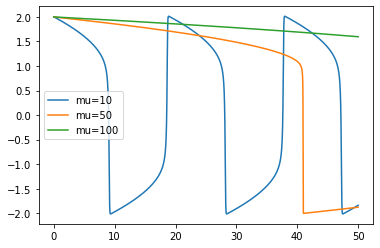

In [98]:
import matplotlib.pyplot as plt

plt.plot(t_exact1, y_exact1[:, 0], t_exact2, y_exact2[:, 0], t_exact3, y_exact3[:, 0])
plt.legend([f'mu={mu1}', f'mu={mu2}', f'mu={mu3}'])

In [ ]:
table1 = create_mesasurement(lambda t, u: f(mu1, t, u), lambda t, u: g(mu1, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact1, y_exact1), [0.5], None, 5000, 15000, verbose=True)
table2 = create_mesasurement(lambda t, u: f(mu2, t, u), lambda t, u: g(mu2, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact2, y_exact2), [0.5], None, 5000, 15000, verbose=True)
table3 = create_mesasurement(lambda t, u: f(mu3, t, u), lambda t, u: g(mu3, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact3, y_exact3), [0.5], None, 5000, 15000, verbose=True)

from IPython.display import HTML, display
print(f'mu={mu1}')
display(HTML(table1))
print(f'mu={mu2}')
display(HTML(table2))
print(f'mu={mu3}')
display(HTML(table3))

Calculating for error: 0.5
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX
Calculating for error: 0.5
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX
Calculating for error: 0.5
Measuring method: ERK
Measuring method: IRK
Measuring method: IMEX


Name,Exec time (s),Step Size,Error
ERK,0.14348,0.01,0.02811
IRK,2.58428,0.01,0.05476
IMEX,1.15577,0.01,0.19294


Name,Exec time (s),Step Size,Error
ERK,0.44997,0.00475,0.49957
IRK,5.68422,0.00385,0.50021
IMEX,3.77613,0.00333,0.8523


Name,Exec time (s),Step Size,Error
ERK,0.33248,0.00724,0.46634
IRK,4.82524,0.00575,0.50116
IMEX,3.22192,0.00491,0.51394


In [102]:
order_result1 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact1[0], Tl, Tr, [2**13, 2**14, 2**15], 2**17)
print('Estimating order from fine grid:')
print(f'Order result: {order_result1[0]}')

Estimating order from fine grid:
Order result: [3.03947572 3.0397785 ]
